# Synthesis in programmatic mode

## Simple synthesis in a chromosphere

For simple calculations, like synthesizing spectral lines in simple models, Hazel v2.0 can be used in programmatic 
mode. For instance, let us generate a spectral window in the near-infrared and synthesize the He I 10830 A line 
with some parameters.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
import hazel
print(hazel.__version__)
label = ['I', 'Q', 'U', 'V']

/scratch/Dropbox/GIT/hazel2/hazel/io.py:12: UserWarning: zarr module not found. You will not be able to use zarr as input/output.
  warnings.warn("zarr module not found. You will not be able to use zarr as input/output.")


2018.06.07


Let's first do a simple experiment in which we synthesize the 10830 A line for a set of parameters. Let's first instantiating a `hazel` model. We set the verbosity to a high level as an example but you should lower it when doing calculations to avoid crowding your terminal:

In [2]:
mod = hazel.Model(working_mode='synthesis', verbose=3)

The first thing to do with the model is to add a spectral region for our synthesis.

In [3]:
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10826, 10833, 150], 'topology': 'ch1',
    'LOS': [0.0,0.0,90.0], 'Boundary condition': [1.0,0.0,0.0,0.0]})

2018-10-01 09:46:57,371 - Adding spectral region spec1
2018-10-01 09:46:57,373 -   - Using wavelength axis from 10826.0 to 10833.0 with 150 steps
2018-10-01 09:46:57,374 -   - No mask for pixels
2018-10-01 09:46:57,376 -   - No instrumental profile
2018-10-01 09:46:57,378 -   - Using LOS [0.0, 0.0, 90.0]
2018-10-01 09:46:57,379 -   - Using boundary condition [1.0, 0.0, 0.0, 0.0]


Note that we need to define the angles defining the line-of-sight, the boundary condition, the wavelength range, the name and the topology. We specify in this case that the topology is just a single chromosphere that we label as `ch1`. We need now to define this chromosphere:

In [4]:
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 
                      'Wavelength': [10826, 10833]})

2018-10-01 09:46:59,038 -     * Adding line : 10830
2018-10-01 09:46:59,039 -     * Magnetic field reference frame : vertical


Now that we have defined all elements of the synthesis, we finish the setup by invoking the following, which will add all topologies to the spectrum and remove unused atmospheres (if any):

In [5]:
mod.setup()

2018-10-01 09:47:03,000 - Adding topologies
2018-10-01 09:47:03,000 -   - ch1
2018-10-01 09:47:03,001 - Removing unused atmospheres
2018-10-01 09:47:03,002 - Number of pixels to read : 1


It's time now to modify the parameters of the chromosphere and do some plots. You can have access to the wavelength axis and to the synthetic spectrum by accessing the `wavelength_axis`and `stokes` properties of `mod.spectrum[name]`, where `name`is the name given to the spectral region.

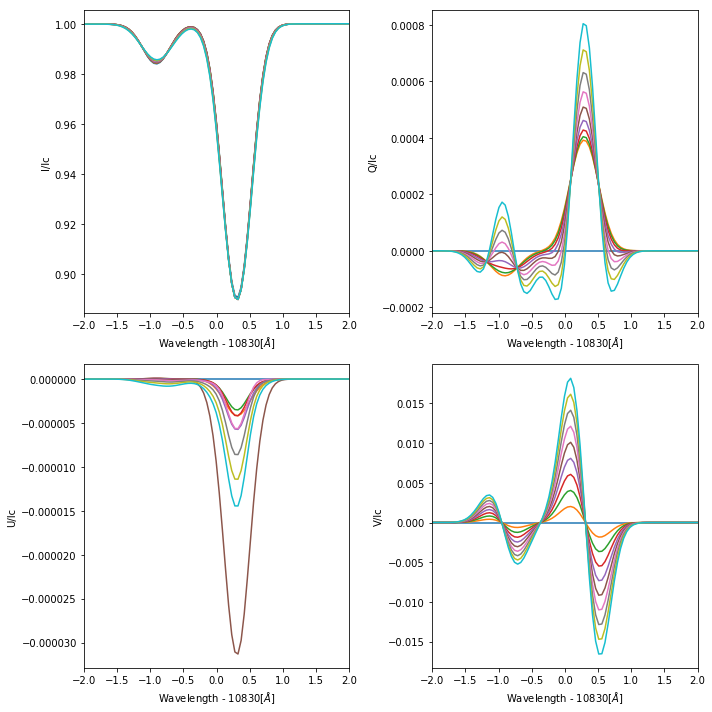

In [6]:
f, ax = pl.subplots(nrows=2, ncols=2, figsize=(10,10))
ax = ax.flatten()
for j in range(10):
    for i in range(4):
        mod.atmospheres['ch1'].set_parameters([50.0*j,0.0,100.0*j,0.2,0.0,8.0,1.0,0.0], 1.0)
        mod.synthesize()
        ax[i].plot(mod.spectrum['spec1'].wavelength_axis - 10830, mod.spectrum['spec1'].stokes[i,:])

for i in range(4):
    ax[i].set_xlabel('Wavelength - 10830[$\AA$]')
    ax[i].set_ylabel('{0}/Ic'.format(label[i]))
    ax[i].set_xlim([-2,2])
    
pl.tight_layout()

As another example, let's generate a profile for an off-limb observation. To this end, we just simply select $\theta_\mathrm{obs}=90^\circ$ and set the boundary condition of intensity to zero.

2018-10-01 09:47:10,303 - Adding spectral region spec1
2018-10-01 09:47:10,304 -   - Using wavelength axis from 10826.0 to 10833.0 with 150 steps
2018-10-01 09:47:10,305 -   - No mask for pixels
2018-10-01 09:47:10,306 -   - No instrumental profile
2018-10-01 09:47:10,308 -   - Using LOS [90.0, 0.0, 90.0]
2018-10-01 09:47:10,309 -   - Using off-limb normalization (peak intensity)
2018-10-01 09:47:10,310 -   - Using boundary condition [0.0, 0.0, 0.0, 0.0]
2018-10-01 09:47:10,312 -     * Adding line : 10830
2018-10-01 09:47:10,313 -     * Magnetic field reference frame : vertical
2018-10-01 09:47:10,314 - Adding topologies
2018-10-01 09:47:10,316 -   - ch1
2018-10-01 09:47:10,318 - Removing unused atmospheres
2018-10-01 09:47:10,319 - Number of pixels to read : 1


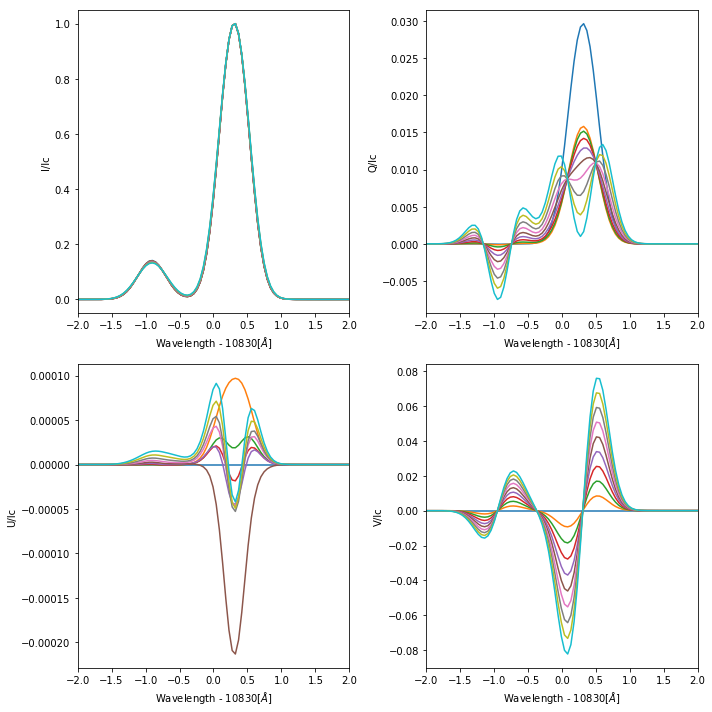

In [7]:
mod = hazel.Model(working_mode='synthesis', verbose=True)
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10826, 10833, 150], 'topology': 'ch1',
    'LOS': [90.0,0.0,90.0], 'Boundary condition': [0.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 
                      'Wavelength': [10826, 10833]})
mod.setup()

f, ax = pl.subplots(nrows=2, ncols=2, figsize=(10,10))
ax = ax.flatten()
for j in range(10):
    for i in range(4):
        mod.atmospheres['ch1'].set_parameters([50.0*j,0.0,100.0*j,0.2,0.0,8.0,1.0,0.0], 1.0)
        mod.synthesize()
        ax[i].plot(mod.spectrum['spec1'].wavelength_axis - 10830, mod.spectrum['spec1'].stokes[i,:])

for i in range(4):
    ax[i].set_xlabel('Wavelength - 10830[$\AA$]')
    ax[i].set_ylabel('{0}/Ic'.format(label[i]))
    ax[i].set_xlim([-2,2])
    
pl.tight_layout()

## Synthesizing with several atmospheres

Now that we know how to compute a single atmosphere, let's complicate things a little and add a photosphere below the chromosphere. We define again the spectral region and add a photosphere and a chromosphere. For the photosphere, it's easier to pass a 1D model that will be automatically read and used. If not, then you would need to read the model yourself and change the parameters. The file contents follows:

In [30]:
%cat photospheres/model_photosphere.1d

ff
1.0

  logtau     T        Pe           vmic        v            Bx           By         Bz
  1.2000   8879.7  2.99831E+03  0.000E+00  0.0000E+00   5.0000E+02    0.0000E+00  0.0000E+00   
  1.1000   8720.2  2.46927E+03  0.000E+00  0.0000E+00   5.0000E+02    0.0000E+00  0.0000E+00   
  1.0000   8551.0  1.98933E+03  0.000E+00  0.0000E+00   5.0000E+02    0.0000E+00  0.0000E+00   
  0.9000   8372.2  1.56782E+03  0.000E+00  0.0000E+00   5.0000E+02    0.0000E+00  0.0000E+00   
  0.8000   8183.7  1.20874E+03  0.000E+00  0.0000E+00   5.0000E+02    0.0000E+00  0.0000E+00   
  0.7000   7985.6  9.11633E+02  0.000E+00  0.0000E+00   5.0000E+02    0.0000E+00  0.0000E+00   
  0.6000   7777.9  6.72597E+02  0.000E+00  0.0000E+00   5.0000E+02    0.0000E+00  0.0000E+00   
  0.5000   7557.6  4.75281E+02  0.000E+00  0.0000E+00   5.0000E+02    0.0000E+00  0.0000E+00   
  0.4000   7326.3  3.25088E+02  0.000E+00  0.0000E+00   5.0000E+02    0.0000E+00  0.0000E+00   
  0.3000   7083.8  2.15232E+02  0.000E+00

In [10]:
mod = hazel.Model(working_mode='synthesis', verbose=True)
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10826, 10833, 150], 'topology': 'ph1->ch1',
    'LOS': [0.0,0.0,90.0], 'Boundary condition': [1.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 
                      'Wavelength': [10826, 10833]})
mod.add_photosphere({'Name': 'ph1', 'Spectral region': 'spec1', 'Spectral lines': [300], 
                      'Wavelength': [10826, 10833], 'Reference atmospheric model': '../models/photospheres/model_photosphere.1d'})
mod.setup()

2018-10-01 09:47:49,575 - Adding spectral region spec1
2018-10-01 09:47:49,577 -   - Using wavelength axis from 10826.0 to 10833.0 with 150 steps
2018-10-01 09:47:49,578 -   - No mask for pixels
2018-10-01 09:47:49,580 -   - No instrumental profile
2018-10-01 09:47:49,580 -   - Using LOS [0.0, 0.0, 90.0]
2018-10-01 09:47:49,581 -   - Using boundary condition [1.0, 0.0, 0.0, 0.0]
2018-10-01 09:47:49,583 -     * Adding line : 10830
2018-10-01 09:47:49,584 -     * Magnetic field reference frame : vertical
2018-10-01 09:47:49,585 -     * Adding line : [300]
2018-10-01 09:47:49,586 -     * Magnetic field reference frame : vertical
2018-10-01 09:47:49,588 -     * Reading 1D model ../models/photospheres/model_photosphere.1d as reference
2018-10-01 09:47:49,592 - Adding topologies
2018-10-01 09:47:49,594 -   - ph1->ch1
2018-10-01 09:47:49,595 - Removing unused atmospheres
2018-10-01 09:47:49,596 - Number of pixels to read : 1


And then do the plots again by changing the velocity of the chromospheric component.

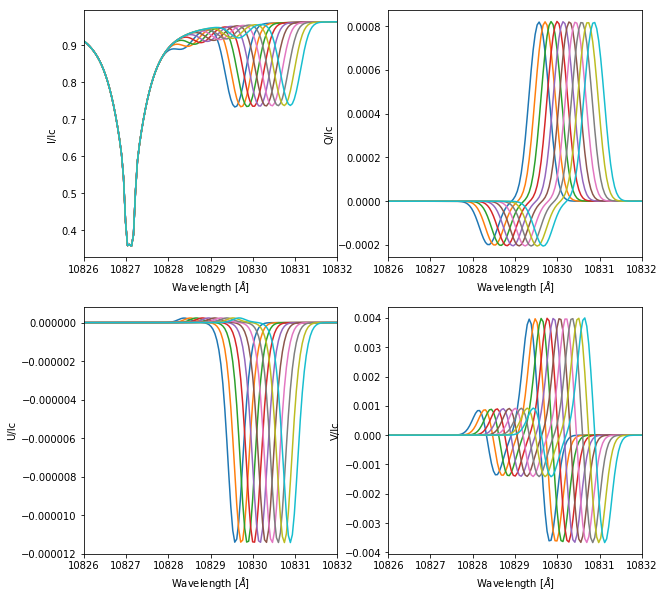

In [11]:
f, ax = pl.subplots(nrows=2, ncols=2, figsize=(10,10))
ax = ax.flatten()
for j in range(10):
    for i in range(4):
        mod.atmospheres['ch1'].set_parameters([50.0,0.0,100.0,0.5,-20.0+4*j,8.0,1.0,0.0], 1.0)
        mod.synthesize()
        ax[i].plot(mod.spectrum['spec1'].wavelength_axis, mod.spectrum['spec1'].stokes[i,:])

for i in range(4):
    ax[i].set_xlabel('Wavelength [$\AA$]')
    ax[i].set_ylabel('{0}/Ic'.format(label[i]))
    ax[i].set_xlim([10826,10832])

## Synthesizing with several chromospheres

Chromospheres (and atmospheres in general) in Hazel can be combined with filling factors (using `+`) or as stacked atmospheres (using `->`). We provide a few examples of that.

### One atmosphere on top of the other

Let's stack two chromospheres together with a photosphere below.

In [12]:
mod = hazel.Model(working_mode='synthesis', verbose=True)
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10826, 10833, 150], 'topology': 'ph1->ch1->ch2',
    'LOS': [0.0,0.0,90.0], 'Boundary condition': [1.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 
                      'Wavelength': [10826, 10833]})
mod.add_chromosphere({'Name': 'ch2', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 
                      'Wavelength': [10826, 10833]})
mod.add_photosphere({'Name': 'ph1', 'Spectral region': 'spec1', 'Spectral lines': [300], 
                      'Wavelength': [10826, 10833], 'Reference atmospheric model': '../models/photospheres/model_photosphere.1d'})
mod.setup()

2018-10-01 09:48:06,530 - Adding spectral region spec1
2018-10-01 09:48:06,533 -   - Using wavelength axis from 10826.0 to 10833.0 with 150 steps
2018-10-01 09:48:06,535 -   - No mask for pixels
2018-10-01 09:48:06,536 -   - No instrumental profile
2018-10-01 09:48:06,539 -   - Using LOS [0.0, 0.0, 90.0]
2018-10-01 09:48:06,540 -   - Using boundary condition [1.0, 0.0, 0.0, 0.0]
2018-10-01 09:48:06,543 -     * Adding line : 10830
2018-10-01 09:48:06,545 -     * Magnetic field reference frame : vertical
2018-10-01 09:48:06,547 -     * Adding line : 10830
2018-10-01 09:48:06,550 -     * Magnetic field reference frame : vertical
2018-10-01 09:48:06,552 -     * Adding line : [300]
2018-10-01 09:48:06,553 -     * Magnetic field reference frame : vertical
2018-10-01 09:48:06,558 -     * Reading 1D model ../models/photospheres/model_photosphere.1d as reference
2018-10-01 09:48:06,562 - Adding topologies
2018-10-01 09:48:06,563 -   - ph1->ch1->ch2
2018-10-01 09:48:06,564 - Removing unused atmo

Now we synthesize the emergent Stokes parameters by changing the velocity of the second component.

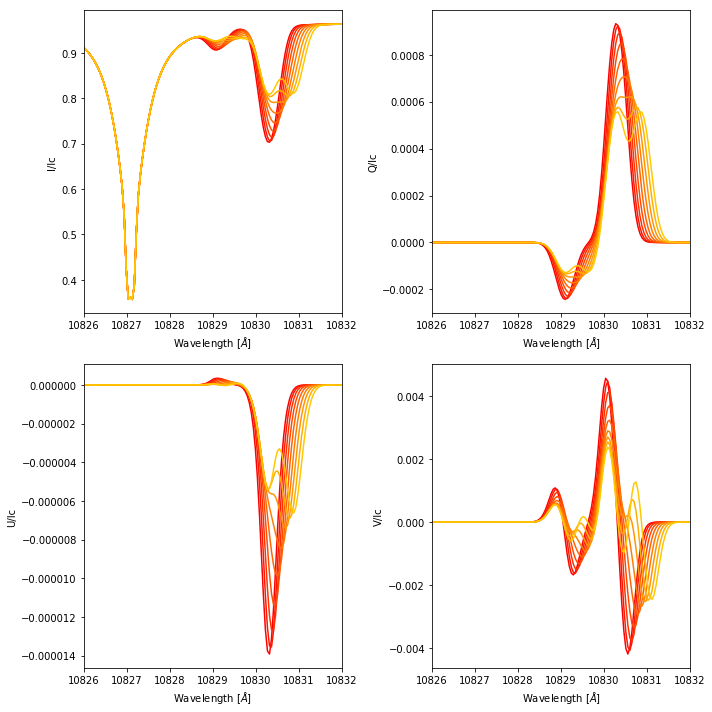

In [13]:
f, ax = pl.subplots(nrows=2, ncols=2, figsize=(10,10))
ax = ax.flatten()
for j in range(9):
#    Bx, By, Bz, tau, v, delta, beta, a
    mod.atmospheres['ch1'].set_parameters([50.0,0.0,100.0,0.3,0.0,8.0,1.0,0.0], 1.0)
    mod.atmospheres['ch2'].set_parameters([50.0,0.0,100.0,0.3,2*j,8.0,1.0,0.0], 1.0)
    mod.synthesize()
    for i in range(4):
        ax[i].plot(mod.spectrum['spec1'].wavelength_axis, mod.spectrum['spec1'].stokes[i,:], color=pl.cm.autumn(25*j))

for i in range(4):
    ax[i].set_xlabel('Wavelength [$\AA$]')
    ax[i].set_ylabel('{0}/Ic'.format(label[i]))
    ax[i].set_xlim([10826,10832])
pl.tight_layout()

### Atmospheres with filling factors

And now we combine the atmospheres with a filling factor.

In [14]:
mod = hazel.Model(working_mode='synthesis', verbose=True)
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10826, 10833, 150], 'topology': 'ph1->ch1+ch2',
    'LOS': [0.0,0.0,90.0], 'Boundary condition': [1.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 
                      'Wavelength': [10826, 10833]})
mod.add_chromosphere({'Name': 'ch2', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 
                      'Wavelength': [10826, 10833]})
mod.add_photosphere({'Name': 'ph1', 'Spectral region': 'spec1', 'Spectral lines': [300], 
                      'Wavelength': [10826, 10833], 'Reference atmospheric model': '../models/photospheres/model_photosphere.1d'})
mod.setup()

2018-10-01 09:48:21,066 - Adding spectral region spec1
2018-10-01 09:48:21,068 -   - Using wavelength axis from 10826.0 to 10833.0 with 150 steps
2018-10-01 09:48:21,069 -   - No mask for pixels
2018-10-01 09:48:21,070 -   - No instrumental profile
2018-10-01 09:48:21,072 -   - Using LOS [0.0, 0.0, 90.0]
2018-10-01 09:48:21,073 -   - Using boundary condition [1.0, 0.0, 0.0, 0.0]
2018-10-01 09:48:21,075 -     * Adding line : 10830
2018-10-01 09:48:21,076 -     * Magnetic field reference frame : vertical
2018-10-01 09:48:21,078 -     * Adding line : 10830
2018-10-01 09:48:21,079 -     * Magnetic field reference frame : vertical
2018-10-01 09:48:21,081 -     * Adding line : [300]
2018-10-01 09:48:21,082 -     * Magnetic field reference frame : vertical
2018-10-01 09:48:21,084 -     * Reading 1D model ../models/photospheres/model_photosphere.1d as reference
2018-10-01 09:48:21,090 - Adding topologies
2018-10-01 09:48:21,092 -   - ph1->ch1+ch2
2018-10-01 09:48:21,096 - Removing unused atmos

Note that filling factors will be combined so that they add up to 1. This way, it is unnecessary to set them by hand to add to 1, it is automatically done by the code. We combine two atmospheres with different velocities and we gradually change the filling factor from 0 to 1.

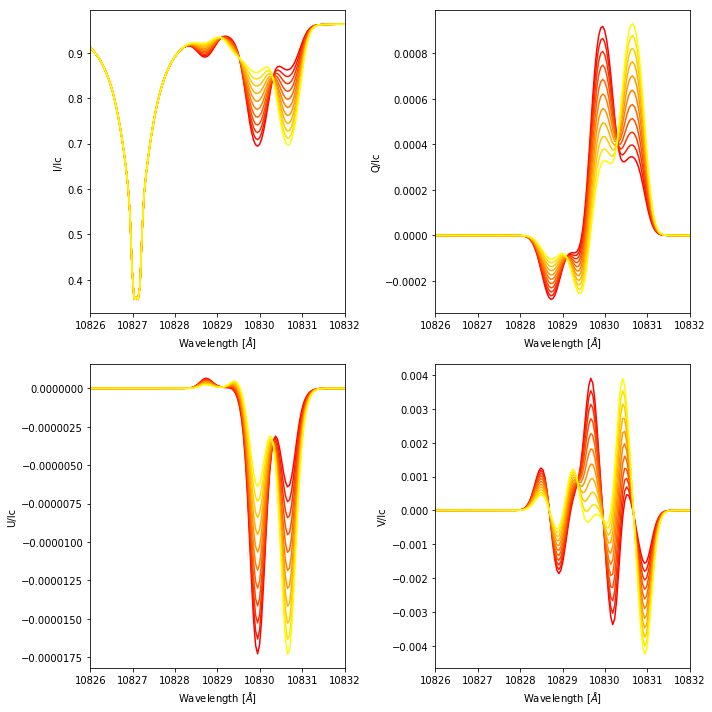

In [15]:
f, ax = pl.subplots(nrows=2, ncols=2, figsize=(10,10))
ax = ax.flatten()
for j in range(11):
#    Bx, By, Bz, tau, v, delta, beta, a
    mod.atmospheres['ch1'].set_parameters([50.0,0.0,100.0,1.0,10.0,8.0,1.0,0.0], j/10.0)
    mod.atmospheres['ch2'].set_parameters([50.0,0.0,100.0,1.0,-10.0,8.0,1.0,0.0], 1.0-j/10.0)
    mod.synthesize()
    for i in range(4):
        ax[i].plot(mod.spectrum['spec1'].wavelength_axis, mod.spectrum['spec1'].stokes[i,:], color=pl.cm.autumn(25*j))

for i in range(4):
    ax[i].set_xlabel('Wavelength [$\AA$]')
    ax[i].set_ylabel('{0}/Ic'.format(label[i]))
    ax[i].set_xlim([10826,10832])
pl.tight_layout()